<a href="https://colab.research.google.com/github/mrunalini-ch/Deep-Learning/blob/main/Task_2(single_perceptron_and_single_layer_perceptron).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SINGLE PERCEPTRO(BINARY CLASSIFICATION)**

**key features:**
1. Use the Pima Indians Diabetes dataset.
2. Train a perceptron.
3. Visualize the decision boundary.

**step 1:** load and preprocess the dataset after importing necessary libraries.

In [63]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
def load_diabetes_data():
    # URL for the Pima Indians Diabetes dataset
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    data = np.genfromtxt(url, delimiter=',')

    # Features: first 8 columns, Labels: last column
    X = data[:, :-1]  # All columns except the last are features
    y = data[:, -1]   # Last column is the label (class)

    return X, y



**Step 2:** pre processing

In [64]:
# Normalize the features
def preprocess_data(X, y):
    # Normalize the features (mean 0, std 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Reduce sample size
def reduce_samples(X, y, num_samples=100):
    # Randomly select indices
    indices = np.random.choice(X.shape[0], num_samples, replace=False)
    X_reduced = X[indices]
    y_reduced = y[indices]

    return X_reduced, y_reduced

**Step 3:** perceptron algorithm, where weights are initialized to zero and updated iteratively based on error

In [65]:
# Perceptron learning algorithm
def perceptron(X, y, learning_rate=0.1, epochs=100):
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term (column of ones)
    weights = np.zeros(X.shape[1])  # Initialize weights to zero

    for epoch in range(epochs):
        for i in range(len(X)):
            activation = np.dot(X[i], weights)
            prediction = 1 if activation >= 0 else 0  # Step function
            error = y[i] - prediction
            weights += learning_rate * error * X[i]  # Update weights

    return weights

**Step 4:** visualization

In [66]:
# Visualize the data and decision boundary
def plot_decision_boundary(X, y, weights):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    grid_points = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
    Z = np.dot(grid_points, weights)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], colors=['red', 'blue'], alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.Paired)
    plt.title('Single Perceptron: Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

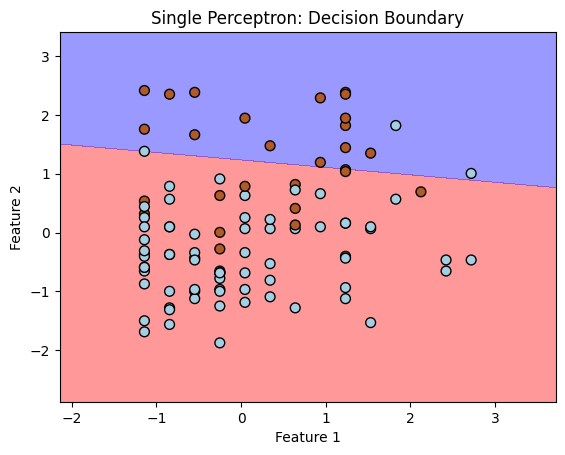

Final weights: [-0.2         0.02049378  0.16208498]


In [68]:
# Main function to run the perceptron
def main():
    X, y = load_diabetes_data()  # Load Diabetes dataset
    X, y = preprocess_data(X, y)  # Normalize the data

    # Reduce sample size (for example, to 100 samples)
    X_reduced, y_reduced = reduce_samples(X, y, num_samples=100)

    # Reduce to first two features for visualization
    X_binary = X_reduced[:, :2]  # First two features for visualization

    # Train perceptron model
    weights = perceptron(X_binary, y_reduced, learning_rate=0.1, epochs=100)

    # Visualize the decision boundary
    plot_decision_boundary(X_binary, y_reduced, weights)

    print(f"Final weights: {weights}")

if __name__ == "__main__":
    main()

**SINGLE LAYER PERCEPTRON(MULTI-CLASS CLASSIFICATION)**

**key features:**
1. iris data set with 150 samples and 4 features
2. training and test sets
3. classification report and confusion matrix to assess moel performance
4. heatmap and scatterplot for visualization.

**Step 1:** load data set after importing the required libaries.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Single-Layer Perceptron model (MLP)
slp_model = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, activation='relu', random_state=42)

**Step 2:** train the model and also evaluate, plotting of confusion matrix.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.85      0.92        13
           2       0.93      1.00      0.96        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.95        45



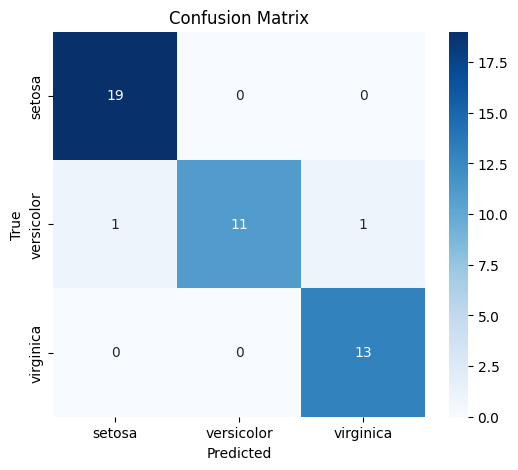

In [70]:

# Train the model
slp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = slp_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Step 3:** visualization

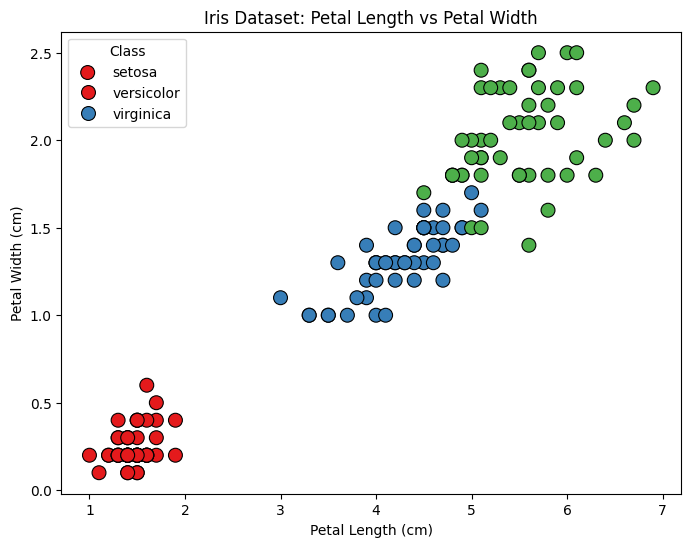

In [71]:
# Select two features for 2D visualization
X_plot = iris.data[:, 2:4] #petal length and petal width
plt.figure(figsize=(8, 6))
# Plot the data points, color-coded by the class labels
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=iris.target, palette="Set1", s=100, marker="o", edgecolor="black")

# Set plot labels and title
plt.title("Iris Dataset: Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Class", labels=iris.target_names)
plt.show()